# <U>**Mini Project 4**</U>

 ## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("transformed_sales_data.csv")

df.head()

,customer_name,order_date,sales,quantity_ordered,returned?,high_value_order,year,month,unit_price,quantity_size,returned_flag,day_of_week,is_weekend,sales_range,cumulative_sales,order_id
0,Alice,2023-01-15,1000.000000,2.0,Yes,True,2023.0,January,500.000000,Medium,1,Sunday,True,High,1000.000000,ORD0001
1,Bob,NaN,850.000000,3.0,No,True,NaN,NaN,283.333333,Medium,0,NaN,False,High,1850.000000,ORD0002
2,alice,NaN,592.857143,1.0,Yes,True,NaN,NaN,592.857143,Low,1,NaN,False,Medium,2442.857143,ORD0003
3,Charlie,NaN,550.000000,1.0,Yes,True,NaN,NaN,550.000000,Low,1,NaN,False,Medium,2992.857143,ORD0004
4,David,NaN,900.000000,4.0,No,True,NaN,NaN,225.000000,High,0,NaN,False,High,3892.857143,ORD0005


## Level 1: Basic Overview of the Dataset

In [20]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nBasic stats:\n", df.describe())

Shape of dataset: (10, 16)

Data types:
 customer_name        object
order_date           object
sales               float64
quantity_ordered    float64
returned?            object
high_value_order       bool
year                float64
month                object
unit_price          float64
quantity_size        object
returned_flag         int64
day_of_week          object
is_weekend             bool
sales_range          object
cumulative_sales    float64
order_id             object
dtype: object

Missing values:
 customer_name       0
order_date          9
sales               0
quantity_ordered    0
returned?           0
high_value_order    0
year                9
month               9
unit_price          0
quantity_size       0
returned_flag       0
day_of_week         9
is_weekend          0
sales_range         0
cumulative_sales    0
order_id            0
dtype: int64

Basic stats:
              sales  quantity_ordered    year  unit_price  returned_flag  \
count    10.000000      

## Level 2: Total Sales Overview

In [4]:
total_sales = df['sales'].sum()
average_sales = df['sales'].mean()

print("Total Sales: ₹", round(total_sales, 2))
print("Average Sale: ₹", round(average_sales, 2))

Total Sales: ₹ 5928.57
Average Sale: ₹ 592.86


## Level 3: Top 5 Customers by Total Sales

In [7]:
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head()
print(top_customers)

customer_name
Alice    1000.000000
David     900.000000
Bob       850.000000
Eve       592.857143
alice     592.857143
Name: sales, dtype: float64


## Level 4: Sales by Month (Bar Chart)

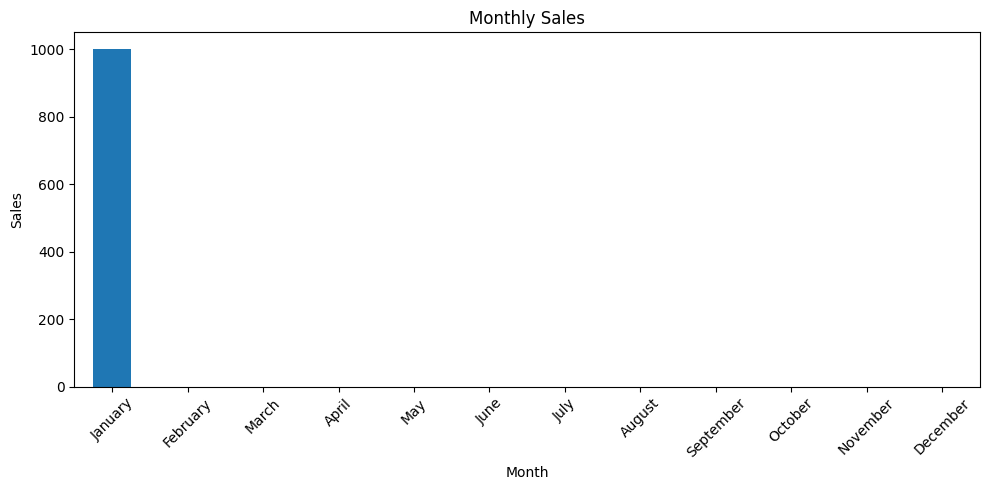

In [12]:
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('month')['sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'])

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Level 5: Returned vs Not Returned Sales (Pie Chart)

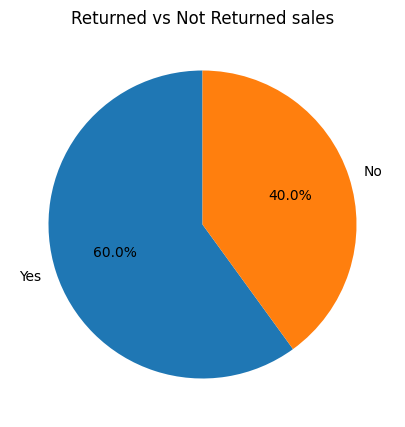

In [14]:
plt.figure(figsize=(10,5))

df['returned?'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Returned vs Not Returned sales')
plt.ylabel("")
plt.show()

## Level 6: Sales Distribution (Histogram)

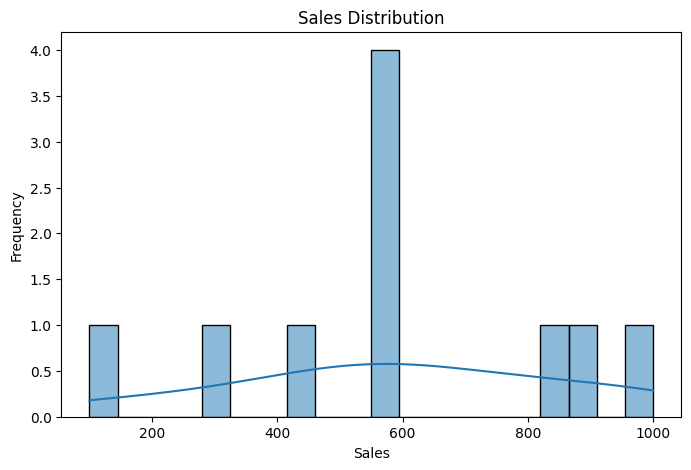

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['sales'], bins=20, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

##  Level 7: Correlation Heatmap

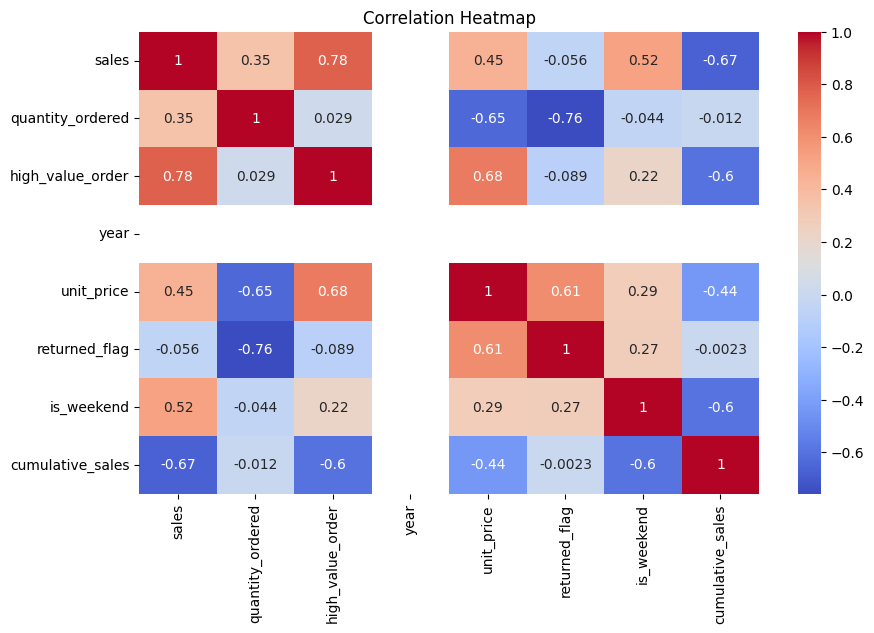

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##  Level 8: Sales by Day of Week (Box Plot)

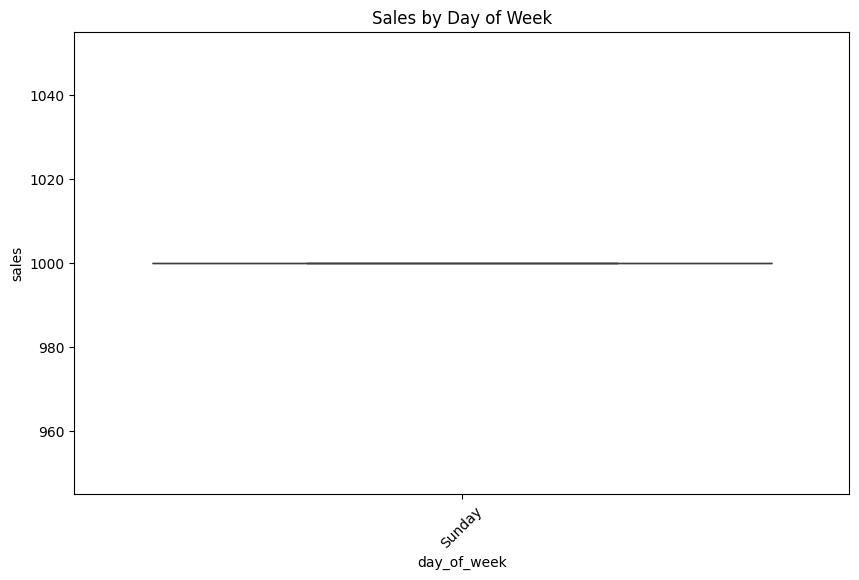

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='sales', data=df)
plt.title("Sales by Day of Week")
plt.xticks(rotation=45)
plt.show()

## Level 9: Compare Sales on Weekend vs Weekday

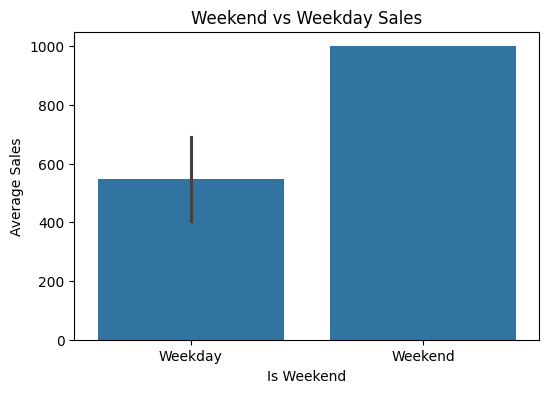

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_weekend', y='sales', data=df)
plt.title("Weekend vs Weekday Sales")
plt.xlabel("Is Weekend")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


## Level 10: Save Summary Insights

In [22]:
# Example summary
summary = {
    "Total Sales": df['sales'].sum(),
    "Average Sale Value": df['sales'].mean(),
    "Highest Single Sale": df['sales'].max(),
    "Most Frequent Customer": df['customer_name'].mode()[0]
}

summary_df = pd.DataFrame(summary.items(), columns=['Metric', 'Value'])
summary_df.to_csv("EDA_summary.csv", index=False)

print("\nEDA summary saved as 'EDA_summary.csv'")



EDA summary saved as 'EDA_summary.csv'


In [23]:
summary_df

,Metric,Value
0,Total Sales,5928.571429
1,Average Sale Value,592.857143
2,Highest Single Sale,1000.0
3,Most Frequent Customer,Alice


___